The Total instances in the Dataset:  18
Target Category wise Number of Records
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  18 non-null     object
 1   Label    18 non-null     object
dtypes: object(2)
memory usage: 420.0+ bytes
Prediction for test set: [0 0 0 1 0]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5

Enter any statement to predict: I like this biryani
Statement is Positive


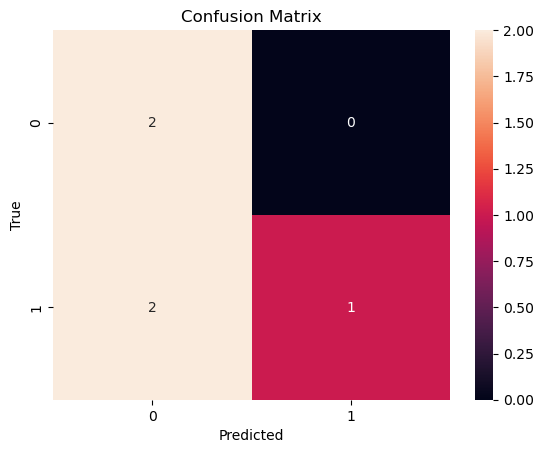

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Data Acquisition and About Data
data = pd.read_csv('C:\\Trash\\Finite Words.csv', names=['Message', 'Label'])
print("The Total instances in the Dataset: ", data.shape[0])

# Display the first few rows of the dataset
data.head()

# Show the number of records for each target category
print('Target Category wise Number of Records')
data.groupby('Label').size()

# Display information about the dataset, including data types and non-null values
data.info()

# Mapping the label to binary form
data['class'] = data.Label.map({'pos': 1, 'neg': 0})
data.head()

# Splitting Train and Test Dataset
X = data["Message"]
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Vectorization using CountVectorizer
count_vect = CountVectorizer()
X_train_dims = count_vect.fit_transform(X_train)
X_test_dims = count_vect.transform(X_test)
df = pd.DataFrame(X_train_dims.toarray(), columns=count_vect.get_feature_names_out())

# Model Building
# Create an MLP Classifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train_dims, y_train)

# Prediction of Test Dataset
y_pred = mlp.predict(X_test_dims)

# Print the predicted values
print("Prediction for test set:", y_pred)

# Actual value and the predicted value
test = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
test

# Evaluation of the Model
matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

# Prediction for New Unseen Statement
test_stmt = [input("Enter any statement to predict: ")]
test_dims = count_vect.transform(test_stmt)
pred = mlp.predict(test_dims)
if pred == 1:
    print("Statement is Positive")
else:
    print("Statement is Negative")
